<a href="https://colab.research.google.com/github/HarshAade/DS_AI/blob/main/Data_Visualisation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation in Python
    
    Data Visualisation is most fundamental and most
    impotant way of derving insights from the data or
    analyzing the data and even communicating with insghit and ideas to bussions



Lets say:
   
   1. Visualisation examples
   2. Using Visualisation to derive and communicate insights
   3. Case Study: Google Play Store Apps Ratings
   4. Data Manipulation and wrangling
   5. Visualisation using python libraries - matplolib and seaborn

# Google Play Store Case Study Question and ans

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


### Session 1 - Introduction to Data Visualisation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we have imported warrings beacuse seaborn tends to have lot of warrings coming out
import warnings
warnings.filterwarnings('ignore')

In [438]:
# Importimg google file
inp0 = pd.read_csv('googleplaystore_v2.csv')

In [439]:
#read the dataset and check the first five rows
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [440]:
# Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning


The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [441]:
# Check the datatypes of all the columns of the dataframe
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Missing Value Treatment

In [442]:
# Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [443]:
inp0.isnull().sum().sum()

1487

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [444]:
# Drop the rows having null values in the Rating field
# as rating as large amount of null values so we have drop it
inp1 = inp0.dropna(subset=['Rating'])

In [445]:
#Check the shape of the dataframe
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [446]:
# Check the number of nulls in the Rating field again to cross-verify
inp1['Rating'].isnull().sum()

0

In [447]:
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum().sum()

8

The Question "Inspect the nulls in the Android Version column" is asking you to check for and handle any missing or null values in the "Android Version" column of a dataset. In other words, the question is asking you to:
- Identify whether there are any null values in the "Android Version" column.
- Count the number of null values in the "Android Version" column.
- Handle the null values in the "Android Version" column by either:
      - Replacing them with a specific value (e.g., 'Unknown').
      - Imputing them with a suitable value based on the context of the data.
This process is important because null values can cause issues when analyzing or processing data, as they can affect calculations, statistics, and visualizations. By inspecting and handling null values, you ensure that your analysis is accurate and reliable.

In [448]:
# Inspect the nulls in the Android Version column
# Check the number of null values in the Android Version column
print(inp1['Android Ver'].isnull().sum())

3


In [449]:
# Fill up the null values in the Android Version column
inp1['Android Ver'] = inp1['Android Ver'].fillna('Unknown')



The Question "Drop the row having shifted values" is asking you to identify and remove rows from a dataset where the values in the "Android Ver" (Android Version) column have changed or "shifted" compared to the previous row.

The steps to accomplish this would be:

1. **Identify rows with shifted values**: You can use the `shift()` function in pandas to compare the current row's "Android Ver" value with the previous row's value. Rows where the values have changed will be marked as `True` in a boolean mask.

2. **Remove the rows with shifted values**: Once you have the boolean mask identifying the rows with shifted values, you can use it to select and drop those rows from the DataFrame.

Here's the code to implement this:

```python
# Assuming your DataFrame is named 'inp1'
# and the 'Android Ver' column contains the Android Version data

# Create a boolean mask to identify rows with shifted values
mask = inp1['Android Ver'].shift() != inp1['Android Ver']

# Drop the rows where the values have shifted
inp2 = inp1.loc[~mask]
```

The key steps are:

1. Use `inp1['Android Ver'].shift()` to get the previous row's Android Version values.
2. Compare the current row's Android Version with the previous row's using `!=`.
3. Invert the boolean mask using `~` to select the rows where the values have not shifted.
4. Use `inp1.loc[~mask]` to create a new DataFrame `inp2` that contains only the rows where the Android Version values have not shifted.

This will remove the rows where the Android Version values have changed compared to the previous row, leaving you with a DataFrame that has a consistent Android Version column.

In [450]:
inp1['Android Ver'].shift()

0                      None
1              4.0.3 and up
2              4.0.3 and up
3              4.0.3 and up
4                4.2 and up
                ...        
10834            2.2 and up
10836            4.1 and up
10837            4.1 and up
10839            4.1 and up
10840    Varies with device
Name: Android Ver, Length: 9367, dtype: object

In [451]:
inp2 = inp1.loc[~inp1['Android Ver'].isin(['Varies with device'])]

In [452]:
# Check the nulls again in Android version column to cross-verify
inp2['Android Ver'].isnull().sum()

0

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

The mode() function is often used to find the most common value in a dataset because it is efficient and easy to use.

In [453]:
# Check the most common value in the Android version column
inp2['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [454]:
# Fill up the nulls in the Android Version column with the above value
inp2['Android Ver'] = inp2['Android Ver'].fillna(inp2['Android Ver'].mode()[0])

Here's a breakdown of what's happening:

1. inp2['Android Ver'] refers to the "Android Ver" column in the inp2 DataFrame.
2. .fillna() is a pandas function that is used to replace null (NaN) values in a Series or DataFrame.
3. inp2['Android Ver'].mode() gets the most common (mode) value in the "Android Ver" column. The mode() function returns a Series, so we take the first element of that Series using ``.
4. The entire expression inp2['Android Ver'].fillna(inp2['Android Ver'].mode()) replaces the null values in the "Android Ver" column with the most common Android Version value.

In [455]:
# Check the nulls in the Android version column again to cross-verify
inp2['Android Ver'].isnull().sum()

0

In [456]:
# Check the nulls in the entire dataframe again
inp2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [457]:
inp2.isnull().sum().sum()

5

In [458]:
# Check the most common value in the Current version column
inp2['Current Ver'].mode()

0    1.0
Name: Current Ver, dtype: object

In [459]:
# Replace the nulls in the Current version column with the above value
inp2['Current Ver'] = inp2['Current Ver'].fillna(inp2['Current Ver'].mode()[0])

#### Handling Incorrect Data Types

In [460]:
#Check the datatypes of all the columns
inp2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The question "Calculating the average price of all apps having the Android version as '4.1 and up'" is asking you to:

1. **Identify** all the apps in your dataset that have an Android Version of "4.1 and up".
2. **Calculate** the average price of those apps.

In other words, you need to:

1. **Filter** the apps based on their Android Version, keeping only those with "4.1 and up".
2. **Calculate** the average price of the filtered apps.

This is a common data analysis task where you want to analyze a specific subset of your data based on certain criteria (in this case, the Android Version) and then perform a calculation (in this case, calculating the average price).

The key steps to accomplish this would be:

1. **Check** if the "Android Version" column contains the value "4.1 and up".
2. **Filter** the DataFrame to include only the rows where the "Android Version" matches "4.1 and up".
3. **Calculate** the average price of the filtered apps using the `mean()` function.

Here's an example of how you can implement this in Python using pandas:

```python
# Assuming your DataFrame is named 'df'
# and the 'Android Version' and 'Price' columns contain the Android Version and Price data

# Filter the DataFrame to include only apps with Android Version "4.1 and up"
filtered_df = df[df['Android Version'] == '4.1 and up']

# Calculate the average price of the filtered apps
average_price = filtered_df['Price'].mean()

print(f"The average price of apps with Android Version '4.1 and up' is: {average_price}")
```

This code first filters the DataFrame to include only the rows where the "Android Version" is equal to "4.1 and up". It then calculates the average price of the filtered apps using the `mean()` function on the "Price" column. Finally, it prints the average price.

By performing this analysis, you can gain insights into the pricing trends of apps targeting devices with Android Version "4.1 and up".

Error will be generated so lets fix it

It appears that the 'Price' column in your DataFrame filtered_df contains non-numeric characters, including dollar signs ($) and potentially other formatting elements. This is preventing the calculation of the mean price because Python cannot convert these strings directly into numbers.

Suggested Changes

Remove non-numeric characters (e.g.,'$') and convert 'Price' column to numeric type
     
  - filtered_df['Price'] = filtered_df['Price'].str.replace('$', '').astype(float)

Now calculate the average price

  - average_price = filtered_df['Price'].mean()
  - print(average_price)

In [461]:
filtered_df = inp2[inp2['Android Ver'] == '4.1 and up']

In [462]:
filtered_df['Price'] = filtered_df['Price'].str.replace('$', '').astype(float)

In [463]:
average_price = filtered_df['Price'].mean()
print(f"The average price of apps with Android Version '4.1 and up' is: {average_price}")

The average price of apps with Android Version '4.1 and up' is: 0.8192326372025256


In [464]:
#Analyse the Price column to check the issue
inp2['Price'].isnull().sum()

0

In [465]:
#Write the function to make the changes
def price_category(inp2):
    if inp2['Price'] == '0':
        return 'Free'

In [466]:
#Verify the dtype of Price once again
inp2['Price'].dtype

dtype('O')

- The term "dtype('O')" in pandas refers to the data type "object", which is used to represent strings or arbitrary Python objects.
- In pandas, the "object" data type is used when a column contains heterogeneous data types, such as a mix of strings, integers, floats, or even custom objects. It is the default data type for columns containing string values.
- When you see "dtype('O')" in the context of a pandas DataFrame or Series, it means that the column or Series has the "object" data type.

In [467]:
#Analyse the Reviews column
inp2['Reviews'].unique()

array(['159', '967', '87510', ..., '885', '603', '1195'], dtype=object)

In [468]:
inp2['Reviews'].dtype

dtype('O')

In [469]:
# Replace 'M' with '000000' to represent millions, convert to float first to handle decimals, then to integer
inp2['Reviews'] = inp2['Reviews'].str.replace('M', '000000').astype('float').astype('int64')

In [470]:
inp2['Reviews'].dtype

dtype('int64')

In [471]:
#Check the quantitative spread of this dataframe
inp2.describe()

,Rating,Reviews,Size
count,8048.000000,8.048000e+03,8048.000000
mean,4.179573,3.172938e+05,22903.084999
std,0.563354,1.873869e+06,22920.417359
min,1.000000,1.000000e+00,8.500000
25%,4.000000,1.200000e+02,5500.000000
50%,4.300000,2.737500e+03,15500.000000
75%,4.500000,4.615300e+04,31000.000000
max,19.000000,4.489389e+07,100000.000000


In [472]:
# Analyse the Installs Column
inp2['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+', 'Free'], dtype=object)

In [473]:
inp2['Installs'].isnull().sum()

0

In [474]:
inp2['Installs'].dtype

dtype('O')

In [475]:
inp2['Installs'].describe()

count           8048
unique            20
top       1,000,000+
freq            1352
Name: Installs, dtype: object

In [476]:
inp2['Installs'].max()

'Free'

In [477]:
inp2['Installs'].min()

'1+'

In [478]:
# Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp2['Installs'] = inp2['Installs'].str.replace(',', '')
inp2['Installs'] = inp2['Installs'].str.replace('+', '')
inp2['Installs'] = inp2['Installs'].replace('Free', 0000).astype(float)
# Replace 'Free' with 0 and then convert to float
# Convert Installs to numeric

In [479]:
inp2['Installs'].quantile(0.5)

100000.0

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


The Question
  
- "Perform the sanity checks on the Reviews column" is asking you to examine the "Reviews" column in a dataset to ensure that the data is valid, consistent, and makes sense.

- "Sanity checks" refer to a set of basic tests or validations that you can perform to ensure the quality and integrity of the data. These checks help you identify any issues or anomalies in the data before proceeding with further analysis.

   For the "Reviews" column, some common sanity checks you can perform include:
  1. Check for missing values: Verify if there are any null or missing values in the "Reviews" column. Missing data can impact your analysis, so it's important to identify and handle it appropriately.
  2. Verify data type: Ensure that the "Reviews" column contains numeric values (integers or floats) and not non-numeric data types like strings or objects. The "Reviews" column should represent the number of reviews, so it should be a numeric data type.
  3. Identify outliers: Look for any unusually high or low values in the "Reviews" column that might be errors or anomalies. Outliers can skew your analysis, so it's important to identify and handle them.
  4. Validate the range: Depending on the context of your data, you can check if the "Reviews" values fall within an expected range. For example, if you know that the maximum number of reviews for an app is 1 million, you can check if all the values in the "Reviews" column are within that range.
  5. Analyze the distribution: Create visualizations like histograms or box plots to understand the distribution of the "Reviews" values. This can help you identify any unusual patterns or irregularities in the data.

By performing these sanity checks, you can ensure that the "Reviews" column is clean, consistent, and ready for further analysis. This will help you make more accurate and reliable conclusions from the data.

In [480]:
#Perform the sanity checks on the Reviews column
inp2[inp2['Reviews'] > inp2['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1.0,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1.0,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5.0,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10.0,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10.0,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,21516.529524,0.0,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,Unknown
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1.0,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [481]:
# Convert 'Price' column to numeric, handling non-numeric values
inp2['Price'] = pd.to_numeric(inp2['Price'], errors='coerce')

In [482]:
# Perform the sanity checks on prices of free apps
inp2[(inp2['Type'] == 'Free') & (inp2['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


*Till the graph personal Question are there*

In [483]:
# Check for missing values
print(f"Number of missing values in 'Reviews' column: {inp2['Reviews'].isnull().sum()}")

Number of missing values in 'Reviews' column: 0


In [484]:
# Verify data type
print(f"Data type of 'Reviews' column: {inp2['Reviews'].dtype}")

Data type of 'Reviews' column: int64


In [485]:
# Identify outliers
print(f"Minimum reviews: {inp2['Reviews'].min()}")
print(f"Maximum reviews: {inp2['Reviews'].max()}")

Minimum reviews: 1
Maximum reviews: 44893888


<Axes: >

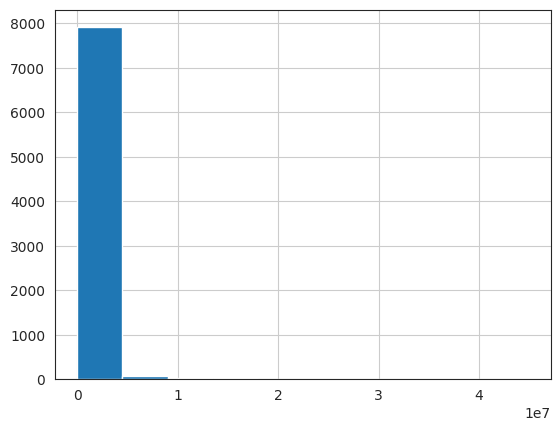

In [486]:
# Analyze the distribution
inp2['Reviews'].hist()

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [487]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

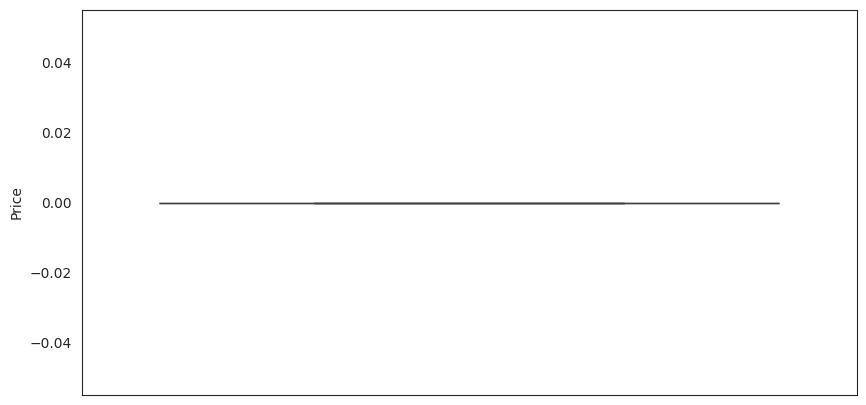

In [488]:
#Create a box plot for the price column
plt.figure(figsize=(10,5))
sns.boxplot(inp2['Price'])
plt.show()

In [489]:
#Check the apps with price more than 200
inp2[inp2['Price'] > 10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [490]:
#Clean the Price column
inp2[inp2['Price'] < 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582.0,100000.0,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [491]:
# Calling all free app
inp2[inp2['Type'] == 'Free'].count().sum()

96980

In [492]:
# calling all paid one
inp2[inp2['Type'] == 'Paid'].count().sum()

7044

ValueError: List of boxplot statistics and `positions` values must have same the length

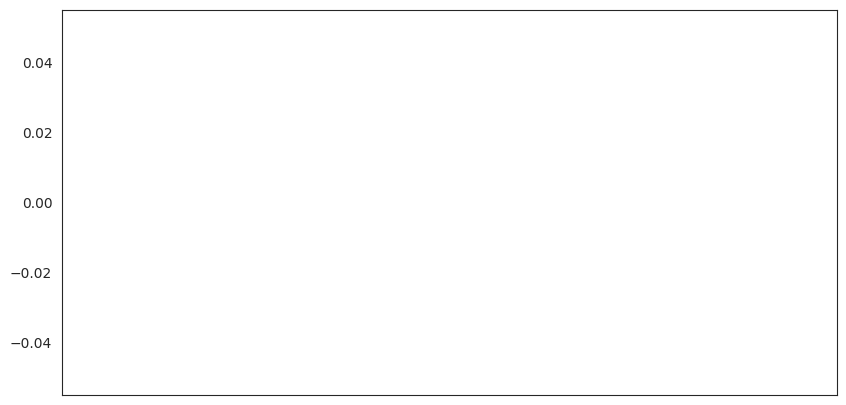

In [493]:
# Create a box plot for paid apps
# Create a box plot for paid apps
plt.figure(figsize=(10,5))
paid_apps = inp2[inp2['Type'] == 'Paid']  # Filter for paid apps
if not paid_apps.empty:
    sns.boxplot(paid_apps['Price'])
    plt.show()
else:
    print("No paid apps found in the dataset.")

In [494]:
# Check the apps with price more than 30
inp2[inp2['Price'] > 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [495]:
# Clean the Price column again
inp2[inp2['Price'] < 200].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


You can adjust the number of bins to improve its granularity

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

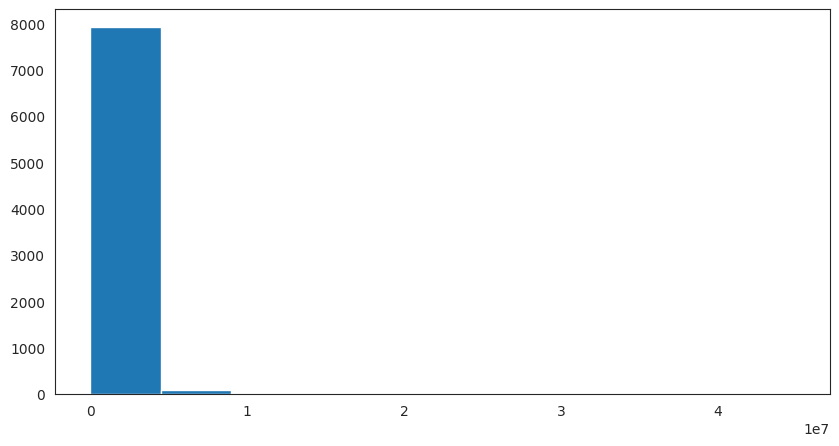

In [496]:
# Create a histogram of the Reviews
plt.figure(figsize=(10,5))
plt.hist(inp2['Reviews'])
plt.show()

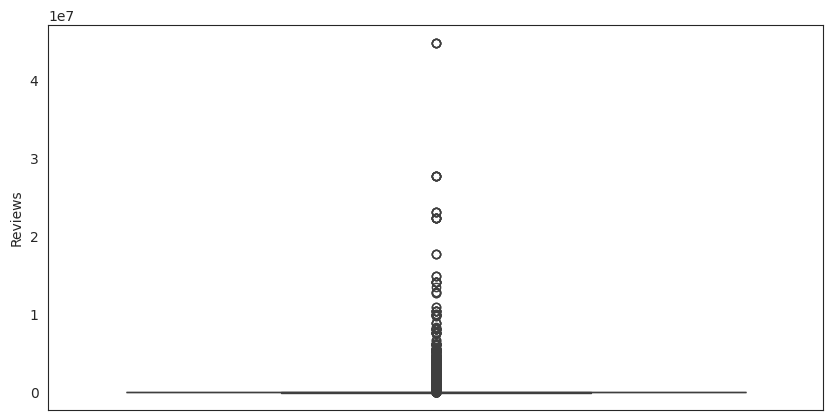

In [497]:
# Create a boxplot of the Reviews column
plt.figure(figsize=(10,5))
sns.boxplot(inp2['Reviews'])
plt.show()

In [498]:
# Check records with 1 million reviews
inp2[inp2['Reviews'] > 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000.0,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.000000,100000000.0,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,21516.529524,100000000.0,Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.000000,100000000.0,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.000000,500000000.0,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,Voice changer with effects,FAMILY,4.2,1260903,8700.000000,50000000.0,Free,0.0,Everyone,Entertainment,"August 2, 2018",3.4.8,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.000000,100000000.0,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000.0,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000.0,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up


In [499]:
# Drop the above records
inp2[inp2['Reviews'] < 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582.0,100000.0,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


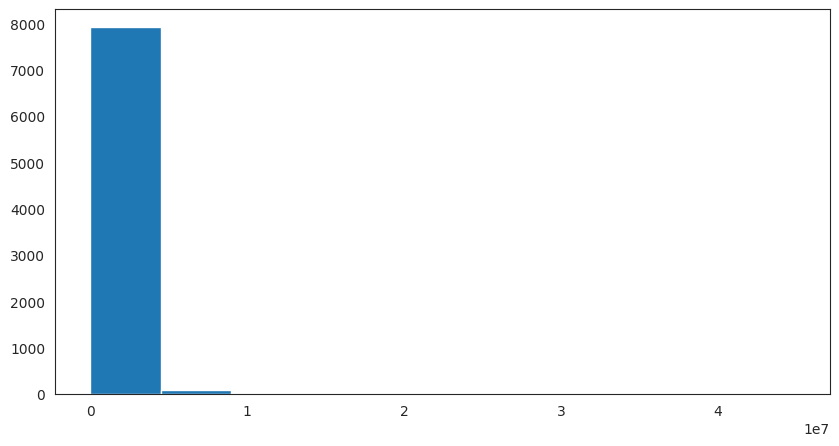

In [500]:
# Create a histogram again and check the peaks
plt.figure(figsize=(10,5))
plt.hist(inp2['Reviews'])
plt.show()

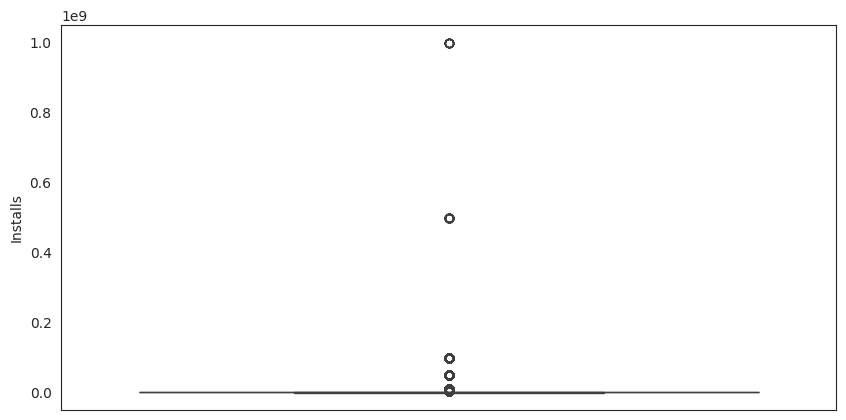

In [501]:
# Create a box plot for the Installs column and report back the IQR
plt.figure(figsize=(10,5))
sns.boxplot(inp2['Installs'])
plt.show()

In [502]:
# CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp2 = inp2[inp2['Installs'] < 100000000]

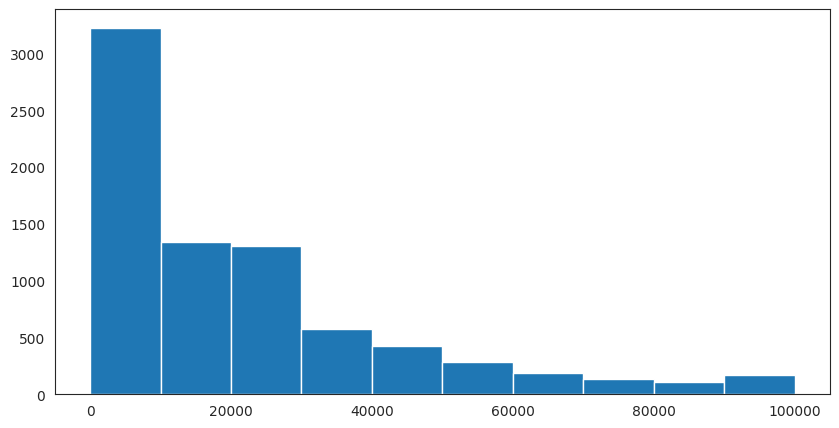

In [503]:
# Plot a histogram for Size as well.
plt.figure(figsize=(10,5))
plt.hist(inp2['Size'])
plt.show()

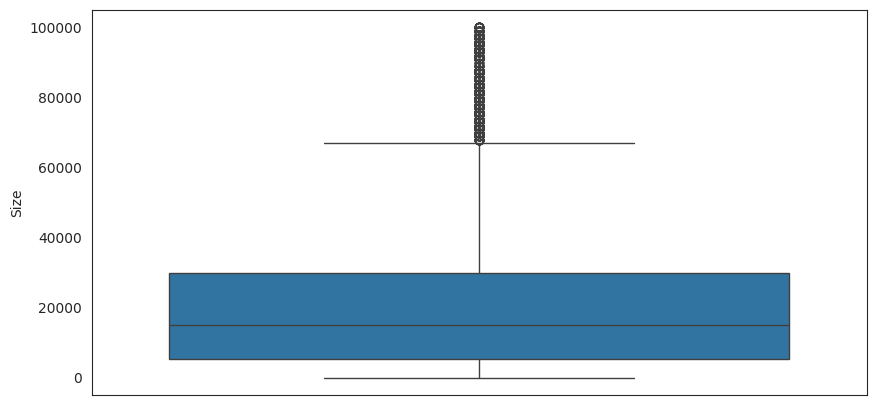

In [504]:
# Create a boxplot for the Size column and report back the median value
plt.figure(figsize=(10,5))
sns.boxplot(inp2['Size'])
plt.show()

# Session 2 - Data Visualisation with *Seaborn*

Seaborn
   
   - Python libaray to create statistical graphs easily
   - Built on top of matplotlib and closely integrated with pandas
   - Functionalities of seaborn:
        1. Data oriented API
        2. Analysing univariate and bivariate distributions
        3. Automatic estimation and plotting of linear regression models
        4. Convenient views for complex datasets
        5. Concise control over style
        6. Colour palettes
        

#### *Distribution Plots*

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

## Data Analysis to answer business questions

     Vedio started

In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we have imported warrings beacuse seaborn tends to have lot of warrings coming out
import warnings
warnings.filterwarnings('ignore')

Question: 01
  
    What are the rating like , what is the distribution of rating  

<Axes: >

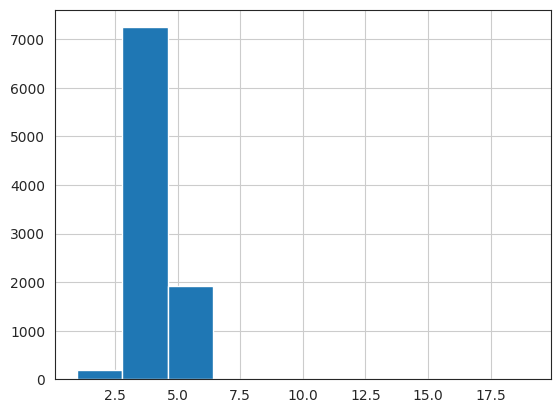

In [506]:
# Distribution of the ratings
inp1['Rating'].hist()

<Axes: xlabel='Rating', ylabel='Density'>

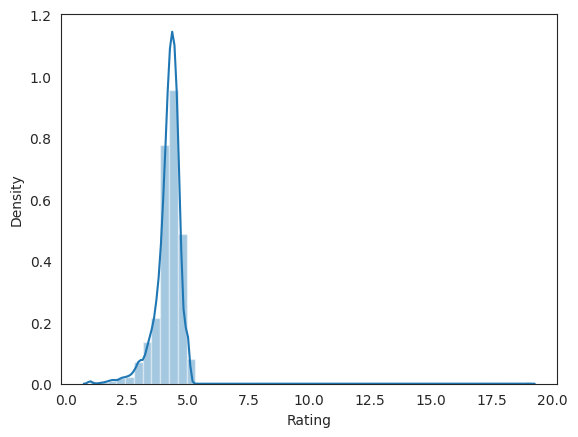

In [507]:
# by using seaborn
# there are many ploting avabile in the seaborn we check it by sns.(tab)
sns.distplot(inp1['Rating'])

# in pervious output on Y axies we were having "Frequency"
# and now in below y axies we have "Density "

<Axes: xlabel='Rating'>

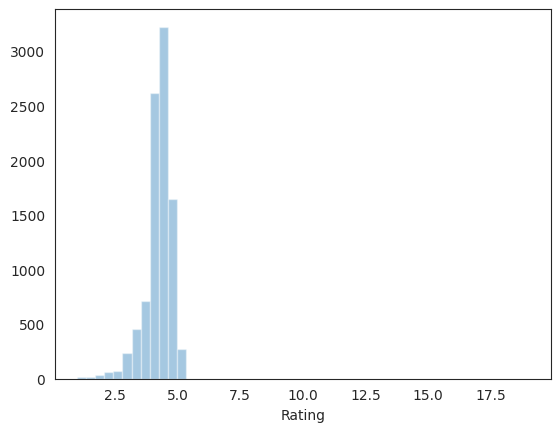

In [508]:
sns.distplot(inp1.Rating,kde = False)

<Axes: xlabel='Density', ylabel='Rating'>

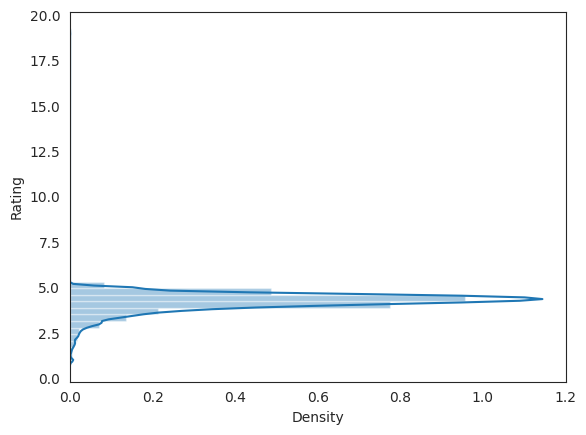

In [509]:
sns.distplot(inp1['Rating'],vertical = True)

Histogram with limited number of - 50




<Axes: xlabel='Rating', ylabel='Density'>

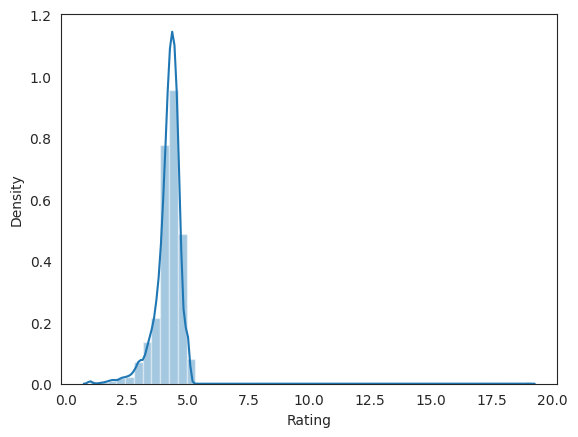

In [510]:
sns.distplot(inp1['Rating'],bins = 50)

<Axes: xlabel='Rating', ylabel='Density'>

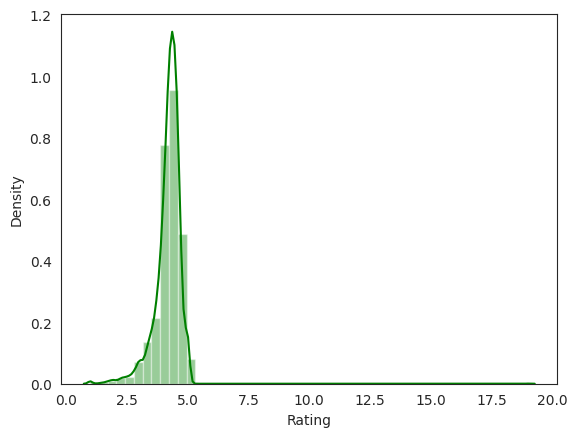

In [511]:
# Changint the color of the plot
# we can put starting word also or code can also be use
sns.distplot(inp1['Rating'],color = 'g')

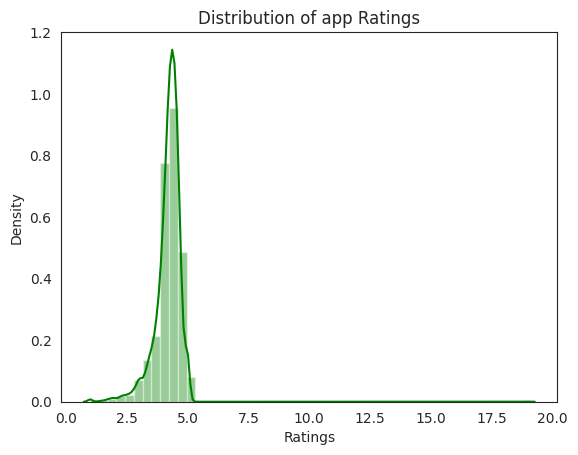

In [512]:
# Now lets add title to the graph and adding font size

sns.distplot(inp1['Rating'],color = 'g')
plt.title('Distribution of app Ratings',fontsize = 12)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

#### *Styling Options*

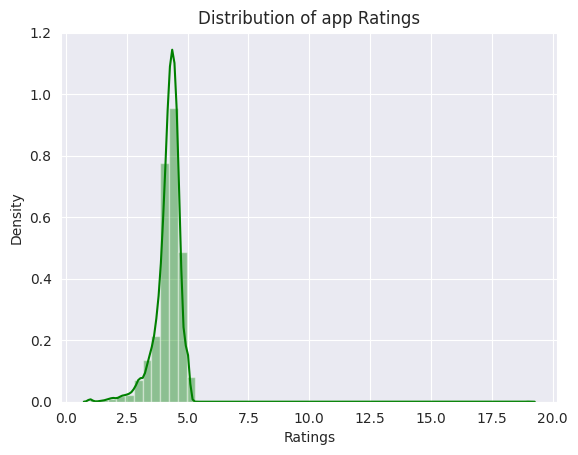

In [513]:
# Use differnet style
sns.set_style('darkgrid')
# if we use white then there will be no background

sns.distplot(inp1['Rating'],color = 'g')
plt.title('Distribution of app Ratings',fontsize = 12)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

In [514]:
# Matplotlib themes / style
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

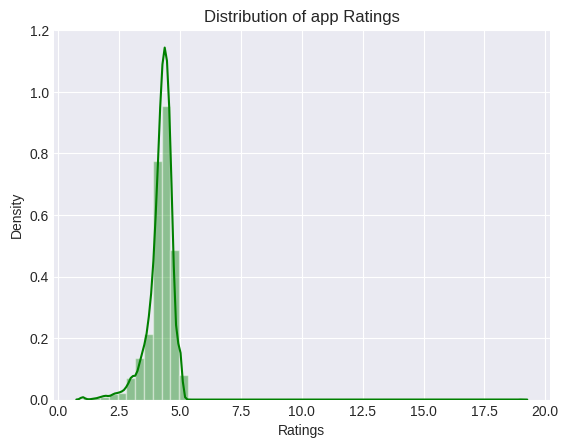

In [515]:
plt.style.use('seaborn-v0_8-darkgrid')

sns.distplot(inp1['Rating'],color = 'g')
plt.title('Distribution of app Ratings',fontsize = 12)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

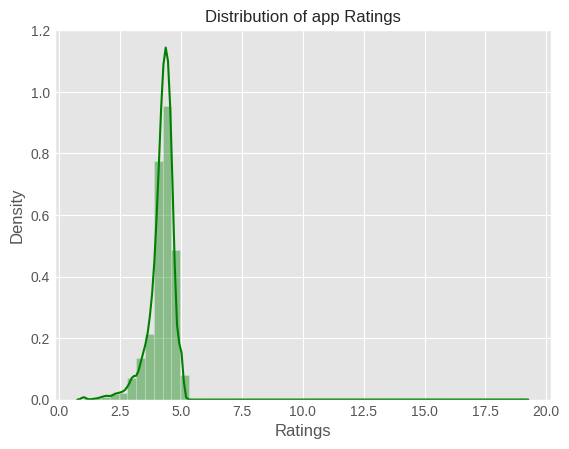

In [516]:
plt.style.use("ggplot")

sns.distplot(inp1['Rating'],color = 'g')
plt.title('Distribution of app Ratings',fontsize = 12)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

In [517]:
# There are many other anme we can use it according to our work
# for more experience we can check and we can apply
# we make graph by using this all

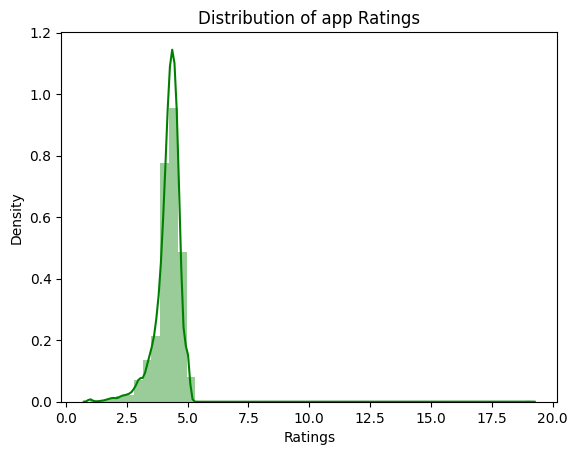

In [518]:
# lets set the graph to default one
plt.style.use('default')
%matplotlib inline
# by using %matplotlib inline we can start freshly means the changes or experment we have done will be removed

sns.distplot(inp1['Rating'],color = 'g')
plt.title('Distribution of app Ratings',fontsize = 12)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()


#### *Pie Chart and Bar Chart*

In [519]:
# lets analysis catagorical column Content Rating
inp1['Content Rating'].value_counts()

Content Rating
Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [520]:
# As in the above output we can see that
# "Adults only 18+" & "Unrated" = total 4 count
# so on less data we cant analysis properly so lets first drop first them

In [521]:
inp1.shape

(9367, 13)

In [522]:
# Dropping records for Adults only 18+ and Unrated
inp1 = inp1[-inp1['Content Rating'].isin(['Adults only 18+', 'Unrated'])]
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [523]:
# As we can see before removing the total count was (9367, 13) and now we can see after  removing 4
inp1.shape

(9363, 13)

In [524]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9363 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9363 non-null   object 
 1   Category        9363 non-null   object 
 2   Rating          9363 non-null   float64
 3   Reviews         9363 non-null   object 
 4   Size            9363 non-null   float64
 5   Installs        9363 non-null   object 
 6   Type            9363 non-null   object 
 7   Price           9363 non-null   object 
 8   Content Rating  9362 non-null   object 
 9   Genres          9363 non-null   object 
 10  Last Updated    9363 non-null   object 
 11  Current Ver     9359 non-null   object 
 12  Android Ver     9363 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [525]:
# As we have drop many values so index will be not in contiune form
# so lets fix it first

inp1.reset_index(inplace = True,drop = True)

In [526]:
# So we can see that we have continue value
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9363 non-null   object 
 1   Category        9363 non-null   object 
 2   Rating          9363 non-null   float64
 3   Reviews         9363 non-null   object 
 4   Size            9363 non-null   float64
 5   Installs        9363 non-null   object 
 6   Type            9363 non-null   object 
 7   Price           9363 non-null   object 
 8   Content Rating  9362 non-null   object 
 9   Genres          9363 non-null   object 
 10  Last Updated    9363 non-null   object 
 11  Current Ver     9359 non-null   object 
 12  Android Ver     9363 non-null   object 
dtypes: float64(2), object(11)
memory usage: 951.1+ KB


In [527]:
inp1['Content Rating'].value_counts()

Content Rating
Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: count, dtype: int64

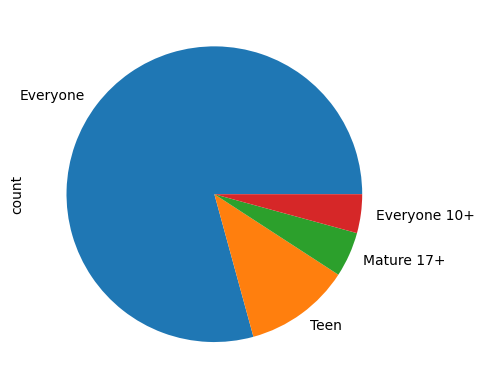

In [528]:
# lets create pie chart for it
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

In [529]:
# So as in the above output we can see that its very difficuit for find
# between "everyone 10+" & "Mature 17+" which one is bigger
# in pie chart we can idenity very easy
# beacuse the more data we have it become more difficuit to find out
# by using pie chart we make anyone pull so its not good i think so

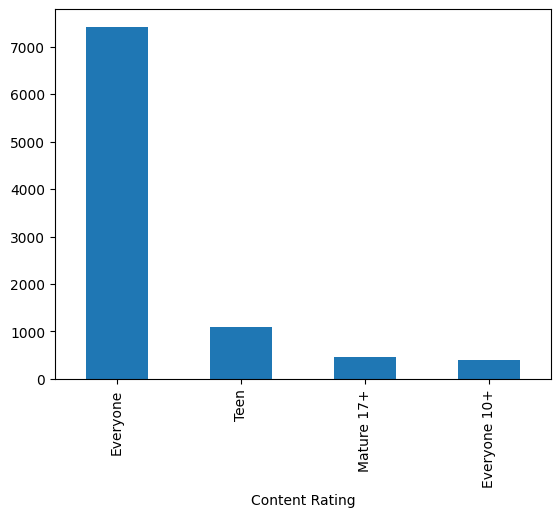

In [530]:
# So i will suggest to make bar chart
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

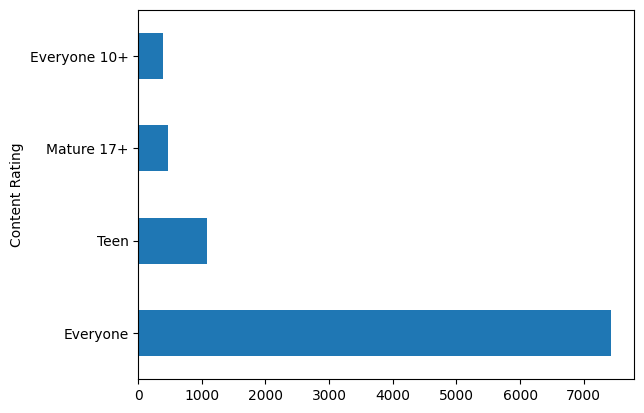

In [531]:
# for making it horizontal we have to just use barh
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

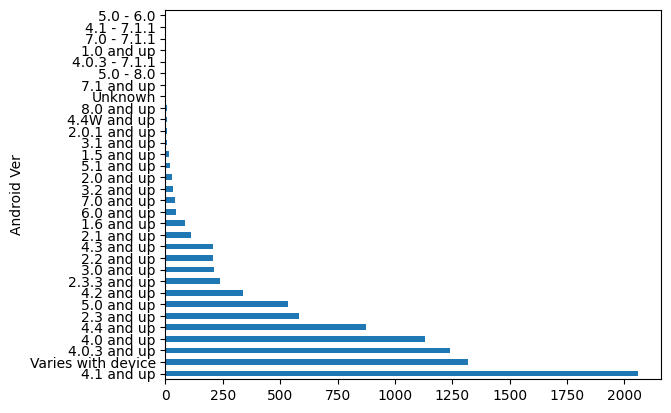

In [532]:
# Plot a bar plot for apps belonging to different types of ‘Android Ver’ and select the category at the fourth highest peak.
inp1['Android Ver'].value_counts().plot.barh()
plt.show()

#### *Scatter Plots*  

 - Useful for plotting the relationship between two numeric variables
 - Each numeric variable would be represented by one of the axes
 - Each datapoint would now be a point in the grid



Question:

     What is the relationship between waiting and the size of the app

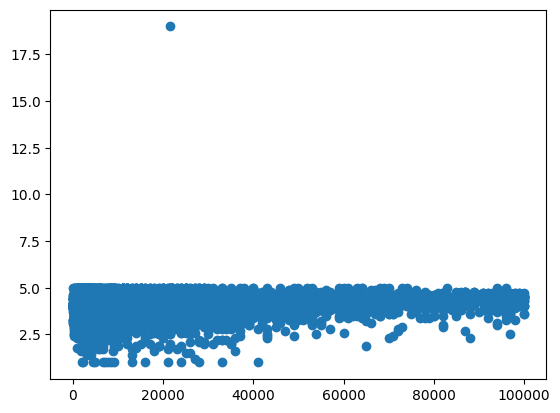

In [533]:
# Scatter plot = Size vs Rating
plt.scatter(inp1['Size'],inp1['Rating'])
plt.show()

In [534]:
sns.set_style('white')

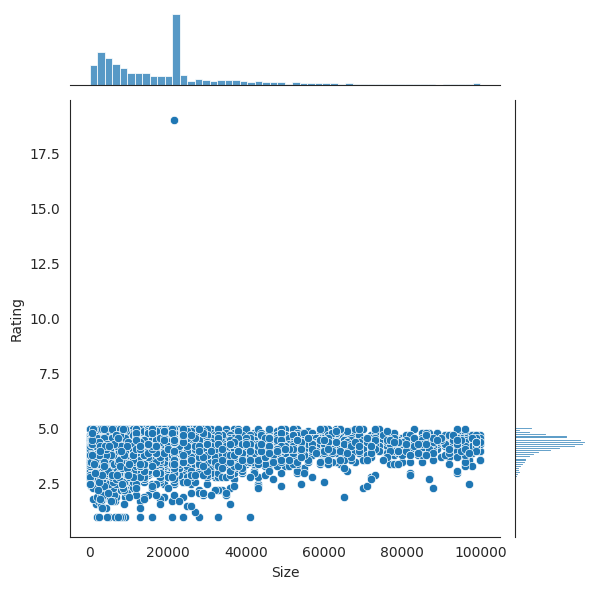

In [535]:
# Performing same in sea born
sns.jointplot(x = 'Size',y = 'Rating',data = inp1)
plt.show()

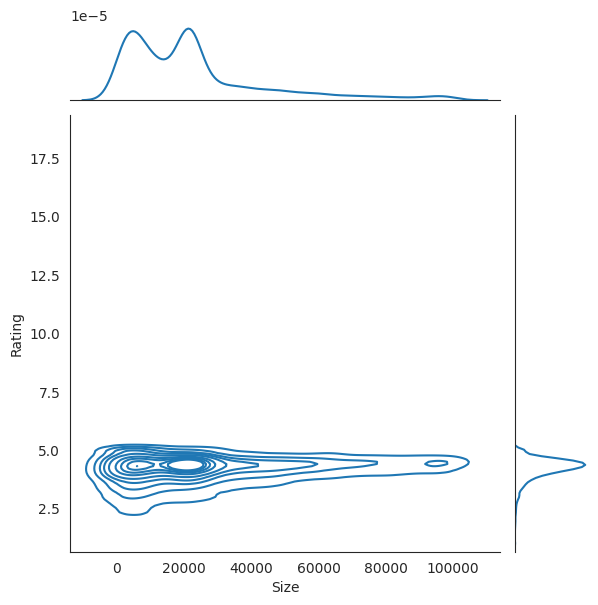

In [536]:
sns.jointplot(data=inp1, x='Size', y='Rating', kind='kde')
plt.show()

#### *Regplots*

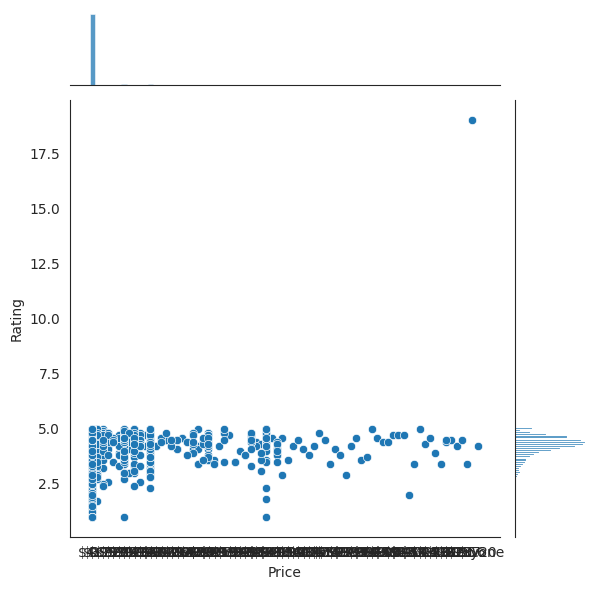

In [537]:
# We have seen assicotion between rating and size
# Dose price also have infuince on rating , lets  check it

# Rating VS Price
sns.jointplot(x = 'Price',y = 'Rating',data = inp1)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

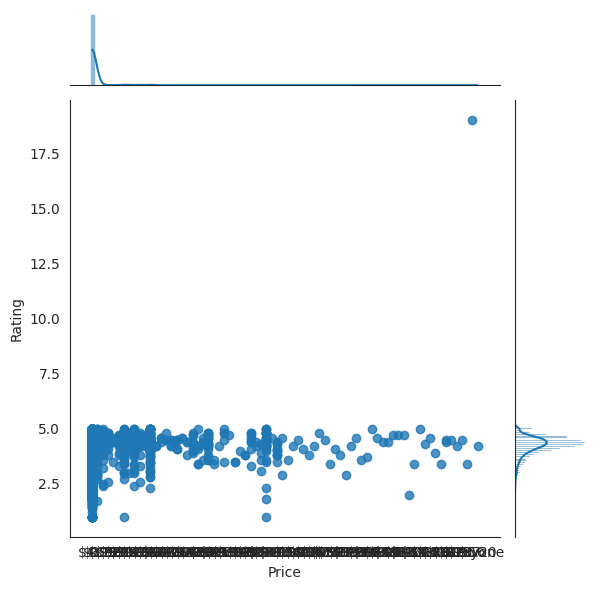

In [538]:
# Regression Analysis
#
# Regression Analysis
sns.jointplot(x = 'Price',y = 'Rating',data = inp1,kind = 'reg')
plt.show()

#### *Pair Plots*

In [539]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9363 non-null   object 
 1   Category        9363 non-null   object 
 2   Rating          9363 non-null   float64
 3   Reviews         9363 non-null   object 
 4   Size            9363 non-null   float64
 5   Installs        9363 non-null   object 
 6   Type            9363 non-null   object 
 7   Price           9363 non-null   object 
 8   Content Rating  9362 non-null   object 
 9   Genres          9363 non-null   object 
 10  Last Updated    9363 non-null   object 
 11  Current Ver     9359 non-null   object 
 12  Android Ver     9363 non-null   object 
dtypes: float64(2), object(11)
memory usage: 951.1+ KB


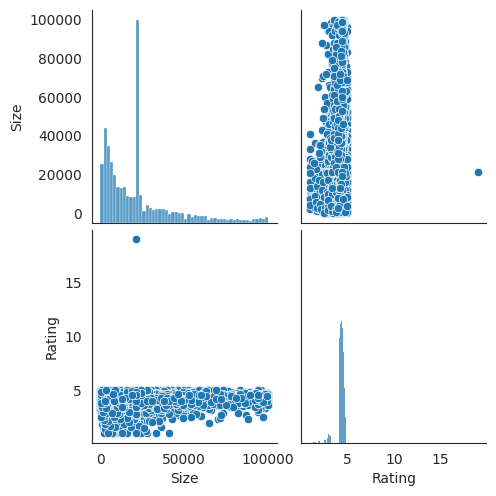

In [540]:
# Looking at all numeric columns together - pair plot
sns.pairplot(inp1[['Size','Price','Rating','Reviews']]) # Pass column names as a list


#### *Revisiting Bar Graphs and Box Plots*

In [541]:
# as we have seen how to assess the assiocation between numerical feature
# Lets assess th assiontion between numeric and charchater feature

# Lets Asses Contant Rating VS Rating
inp1.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Everyone        4.186375
Everyone 10+    4.257179
Mature 17+      4.123427
Teen            4.233487
Name: Rating, dtype: float64

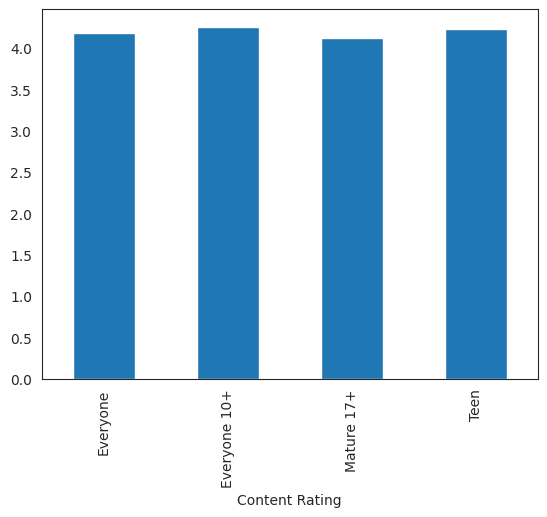

In [542]:
# As the above output is in series so lets plot it
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

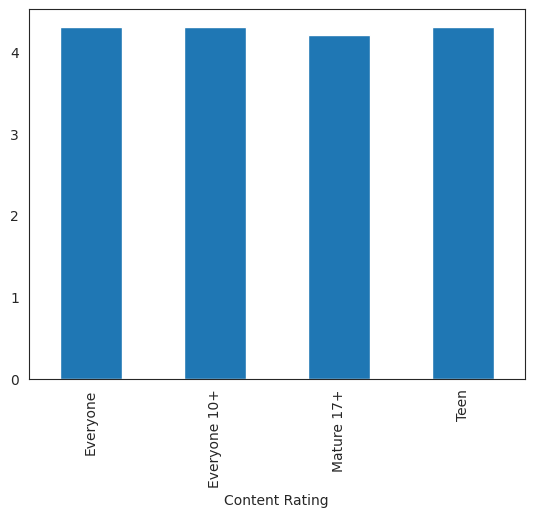

In [543]:
# As from mean we are not able not understand so lets make use of median
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

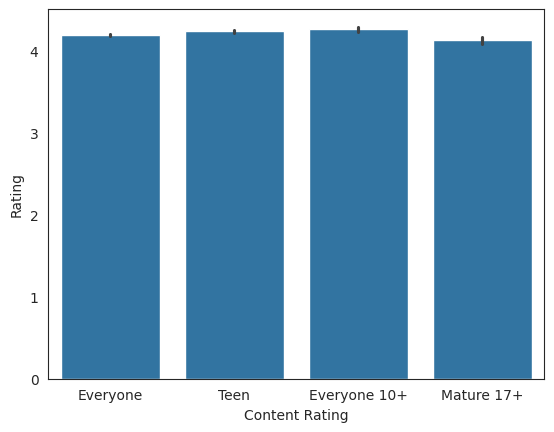

In [544]:
# As we can see by using mean and mediun we can analysis so lets make some coustome
sns.barplot(x = 'Content Rating',y = 'Rating',data = inp1)
plt.show()

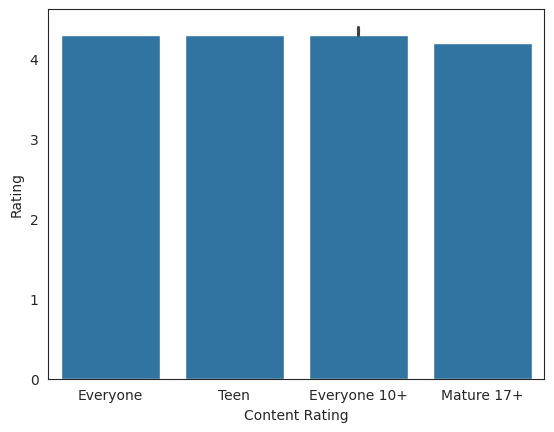

In [545]:
# now lets say we want mediun here so
sns.barplot(x = 'Content Rating',y = 'Rating',data = inp1,estimator=np.median)
plt.show()

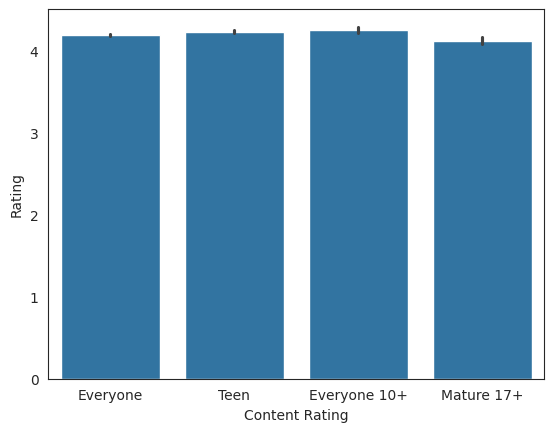

In [546]:
# now lets say we want median here so
sns.barplot(x = 'Content Rating',y = 'Rating',data = inp1,estimator=np.mean)
plt.show()

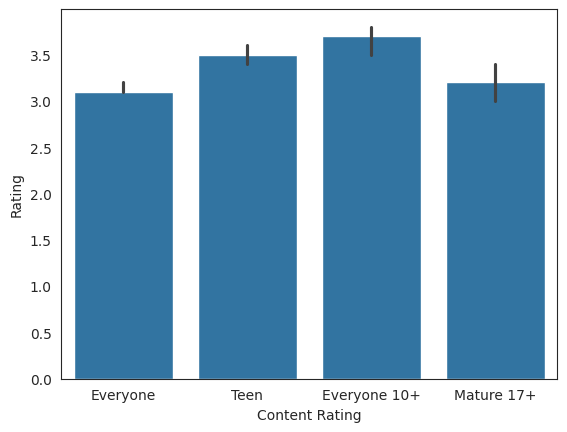

In [547]:
# As by using many things we are not able to find proper out so in this estimator fucntion we can pass lambda function and custom are filter
sns.barplot(x = 'Content Rating',y = 'Rating',data = inp1,estimator=lambda x: np.quantile(x,0.05))
# we want 5th percentile or 5ht out of 100th postiton
plt.show()

# We are saying that inshort outoff 100th postition what 5th gay rating have

<Axes: xlabel='Content Rating', ylabel='Rating'>

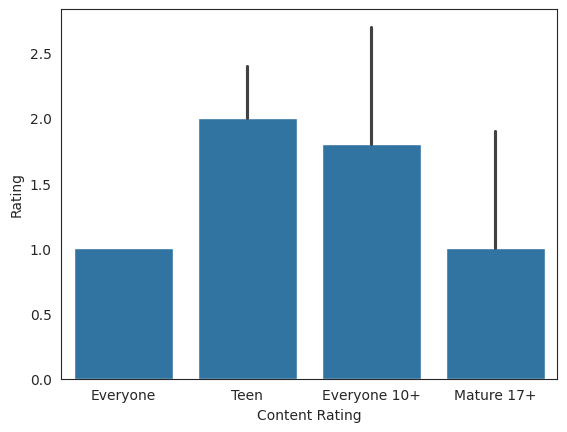

In [548]:
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator = np.min)

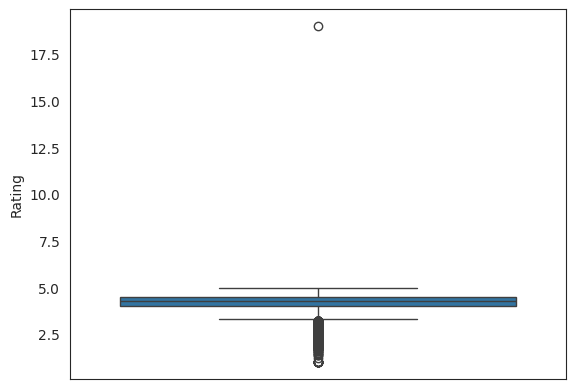

In [549]:
# Plot a box plot for the Rating column. The lower fence gets capped between which of the following?
sns.boxplot(inp1['Rating'])
plt.show()

In [550]:
# Plot a box plot for the four most popular Genres, and select the Genre having the highest Rating at the lower fence from the following options.
inp1.groupby(['Genres'])['Rating'].mean().sort_values(ascending = False)

Genres
February 11, 2018                      19.000000
Comics;Creativity                       4.800000
Board;Pretend Play                      4.800000
Health & Fitness;Education              4.700000
Adventure;Brain Games                   4.600000
                                         ...    
Health & Fitness;Action & Adventure     3.900000
Art & Design;Pretend Play               3.900000
Educational                             3.871875
Parenting;Education                     3.866667
Parenting;Brain Games                   3.800000
Name: Rating, Length: 116, dtype: float64

In [551]:
# we saw median , mean and lower pencential value also
# but we have to make 3 differnt view to mkae this insights
# why not make a view which make distributed for each catagoire
# Why not make box plot for each catogorie

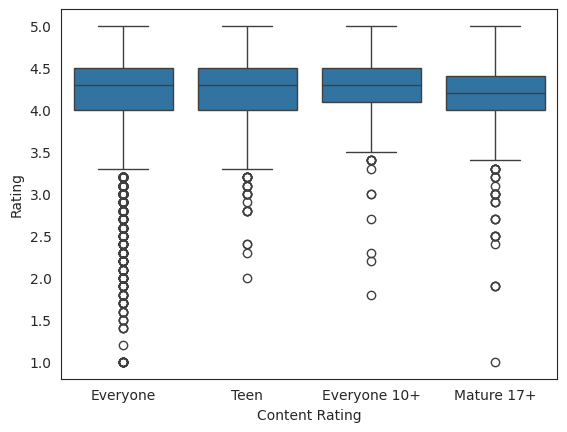

In [552]:
# Box plot of rating for each content rating
sns.boxplot(x = 'Content Rating',y = 'Rating',data = inp1)
plt.show()

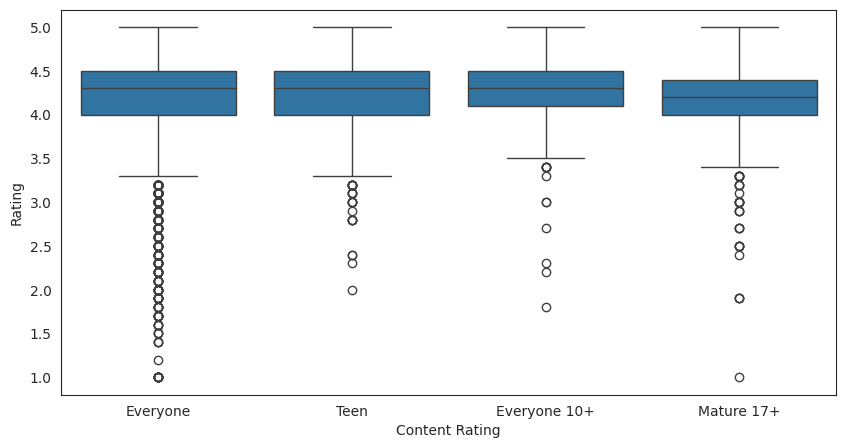

In [553]:
# making figure size big
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Content Rating',y = 'Rating',data = inp1)
plt.show()

#### *Heatmaps*

  - Perferred for visualising numeric values in a grid or a matrix
  - We want to check how Size and Reviews interact with respect to Rating
  - Create Buckets of Size and Reviews
  - One would represnt the row and another would represnt the columns
  - Each cell would represnt the rating correspondig to that bucket
  - To Visualise this matrix each cell would have a different colour shade depending on the rating

In [554]:
# As till now we have seen 2 varaible at a time
# we have seen content rating VS Rating as will as Content Rating with other Numerical feature
# Now lets say we have more then 2 varaibles

# lets Check 3 thing at a time
# Now lets Check Rating VS Size VS Content Rating

# Content Rating is already a catorgire so we dont need to create a bucket on top of it
# Size is numerical field and we need to make it in the catgorical bucket
# we need to assionaly cut the size and make them into bines or ranges

In [555]:
import pandas as pd

In [556]:
inp1["Size_Bucket"] = pd.qcut(inp1['Size'],[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])

In [557]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [558]:
pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size_Bucket',values = 'Rating')
# As the Output is in mean value

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.112653,4.168009,4.255457,4.165023,4.220790
Everyone 10+,4.189474,4.251282,4.253153,4.226761,4.283439
Mature 17+,4.112281,4.057292,4.098592,4.174603,4.194175
Teen,4.205455,4.221893,4.207101,4.228462,4.276855


In [559]:
# As we dissucc early Mean is not matrix to dissuc in this situation
# May be Median or some percentaile will be better option

pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size_Bucket',values = 'Rating',aggfunc = np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.30,4.3
Everyone 10+,4.1,4.3,4.3,4.30,4.4
Mature 17+,4.3,4.2,4.2,4.20,4.2
Teen,4.3,4.3,4.3,4.25,4.3


In [560]:
pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size_Bucket',values = 'Rating',aggfunc = lambda x: np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.1,3.8,4.00
Everyone 10+,3.86,4.06,4.1,4.0,4.02
Mature 17+,3.42,3.60,4.0,3.9,4.00
Teen,3.80,3.90,4.0,4.0,4.00


In [561]:
res = pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size_Bucket',values = 'Rating',aggfunc = lambda x: np.quantile(x,0.2))

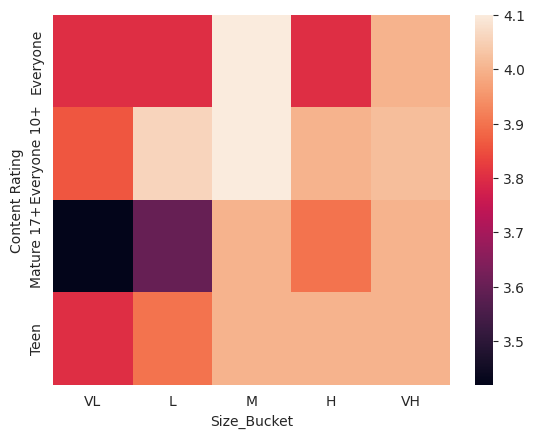

In [562]:
sns.heatmap(res)
plt.show()

In [563]:
# AS we can read proper and the value are also not mention
# So lets make it little bit easy read
# will use customize option we have

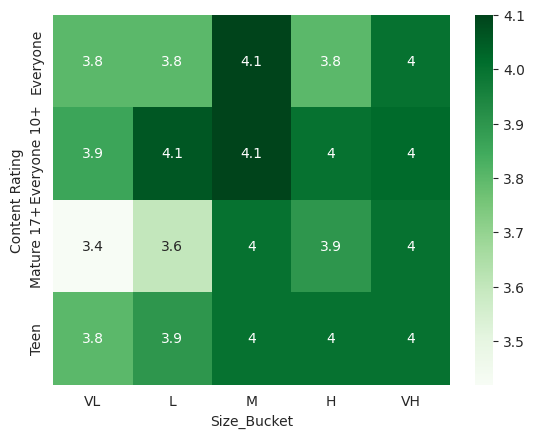

In [564]:
# Lets use color map
# By using annot = True we can display text on it
sns.heatmap(res,cmap = 'Greens',annot = True)
plt.show()

#### *Line Charts*

In [565]:
# Lets Check Month by month rating
# Analyze the ratings by month
# As we can see last updated date is object
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size               float64
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [566]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [567]:
# As we can see its string value
# Lets convert this into date/time

# Lets convert this into date/time
# Use the 'infer_datetime_format' parameter to handle different date formats
# Use the 'errors='coerce'' parameter to handle invalid dates
inp1['Updated_Month'] = pd.to_datetime(inp1['Last Updated'], infer_datetime_format=True, errors='coerce').dt.month

In [568]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,L,1.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,8.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,6.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,6.0


In [569]:
# Now we have month value avabile
# Lets Genarate AVG rating for each month

inp1.groupby(['Updated_Month'])['Rating'].mean()

Updated_Month
1.0     4.142892
2.0     4.096200
3.0     4.114000
4.0     4.154600
5.0     4.161031
6.0     4.184372
7.0     4.249929
8.0     4.293442
9.0     4.042636
10.0    4.016460
11.0    4.112298
12.0    4.071006
Name: Rating, dtype: float64

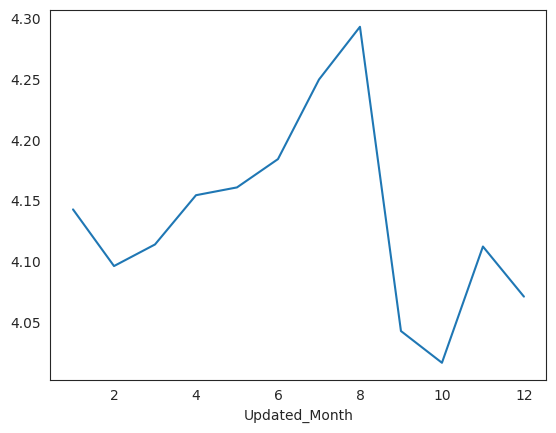

In [606]:
# As we have seen the mean rating of each month so for better understanding lets plot a line plot
inp1.groupby(['Updated_Month'])['Rating'].mean().plot()
plt.show()

#### *Stacked Bar Charts*


Didnt work properly check it once all the code

In [597]:
pd.pivot_table(data = inp1,index = 'Updated_Month',columns = 'Content Rating',values = 'Installs',aggfunc = sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_Month,,,,
1.0,"10,000+500,000+100,000+10,000+500,000+50,000,0...","10,000,000+10,000,000+10,000,000+10,000,000+10...","100+100,000+100,000+100,000+100,000+100+100,00...","10,000,000+100,000+500,000+10,000,000+10,000+1..."
2.0,"500,000+500,000+5,000,000+5,000,000+5,000,000+...","10,000+500,000+500,000+500,000+1,000,000+1,000...","100,000+100,000+500,000+10,000+5,000,000+500+1...","100,000+10,000+5,000,000+1,000,000+10,000,000+..."
3.0,"50,000+100,000+100,000+500,000+100,000+500,000...","10,000,000+1,000,000+10,000+1,000,000+500,000+...","100,000+100,000+100,000+10,000+100+50,000+100,...","100,000+10,000,000+10,000,000+10,000,000+100,0..."
4.0,"50,000+100,000+10,000+100,000+100,000+100,000+...","500,000+5,000,000+100,000+100,000+50,000+10,00...","500,000+50,000+1,000,000+50,000+5,000+1,000+10...","10,000,000+10,000+10,000,000+10,000,000+10,000..."
5.0,"50,000+100,000+100,000+100,000+100,000+100,000...","10,000,000+10,000,000+1,000+1,000,000+1,000,00...","100,000+1,000,000+5,000,000+10,000+10,000,000+...","10,000,000+10,000+1,000,000+1,000,000+1,000,00..."
6.0,"100,000+1,000,000+100,000+5,000+100,000+50,000...","100,000+1,000+100,000+10,000,000+100,000,000+1...","5,000,000+10,000+5,000+500,000+1,000,000+500,0...","50,000,000+1,000,000+1,000,000+10,000+10,000,0..."
7.0,"10,000+1,000,000+500,000+10,000,000+50,000+10,...","500,000+1,000,000+100,000+10,000+500,000+10,00...","50,000+1,000,000+10,000+1,000,000+100,000,000+...","10,000,000+50,000+100,000,000+100,000+10,000,0..."
8.0,"5,000,000+100,000+5,000,000+100,000+500,000+10...","10,000,000+10,000,000+10,000,000+1,000,000+5,0...","50,000+10,000,000+10,000,000+100,000+500,000+1...","100,000,000+1,000,000+1,000,000,000+100,000,00..."
9.0,"1,000,000+1,000,000+100,000+10,000,000+1,000,0...","10,000+10,000+1,000,000+100,000+100,000+500,00...","1,000,000+1,000,000+100,000+100,000+1,000+10+","1,000,000+100,000+5,000,000+1,000,000+500,000+..."


In [600]:
montlhy= pd.pivot_table(inp1,index = 'Updated_Month',columns = 'Content Rating',values = 'Installs',aggfunc =sum)

In [601]:
monthly

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_Month,,,,
1.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0


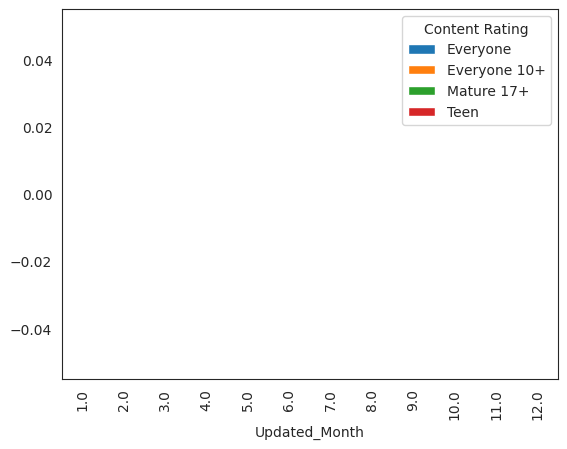

In [607]:
monthly.plot(kind = 'bar',stacked = True)
plt.show()

In [630]:
mon = pd.pivot_table(inp1,index = 'Last Updated',columns = 'Content Rating',values = 'Installs',aggfunc =sum)

In [631]:
# Get Proportions instead of absolute value
monthly[[ 'Everyone','Everyone 10+','Teen','Mature 17+']].apply(lambda x: x/x.sum(),axis = 1)

Content Rating,Everyone,Everyone 10+,Teen,Mature 17+
Updated_Month,,,,
1.0,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN


#### Plotly

Ploty is a open source Graphing Library use to make intertive plot

In [632]:
inp1.groupby(['Updated_Month'])['Rating'].mean()

Updated_Month
1.0     4.142892
2.0     4.096200
3.0     4.114000
4.0     4.154600
5.0     4.161031
6.0     4.184372
7.0     4.249929
8.0     4.293442
9.0     4.042636
10.0    4.016460
11.0    4.112298
12.0    4.071006
Name: Rating, dtype: float64

In [639]:
# By using recent_index() we can see in them in proper format
res = inp1.groupby(['Updated_Month'])['Rating'].mean().reset_index()

In [641]:
res

,Updated_Month,Rating
0,1.0,4.142892
1,2.0,4.096200
2,3.0,4.114000
3,4.0,4.154600
4,5.0,4.161031
5,6.0,4.184372
6,7.0,4.249929
7,8.0,4.293442
8,9.0,4.042636
9,10.0,4.016460


In [640]:
import  plotly.express as px

In [643]:
fig = px.line(res,x = 'Updated_Month',y = 'Rating',title = 'Rating VS Month')
fig.show()

# As we can see in this graph if we go on the point we can see the mark
# for example if want to check any month then just go in that month
# its very handy there is option to zoom full screen and many more

Its very usefull package

As we have saw matplotlib , seaborn, and we saw plotly also

while plotly is very good for interative and so on its actually of lot of coding and we have to understand its architure for makeing plots its gets lot of efforts to get data in proper format

matplotlib and seaborn they have lot of harmine between each other and we already we can very easily hinomve back and between them and they are avabile in dataframe as well

So its very realy convitent to use datafram in conjuction with seaborn or matplotlib to get all the visulation with minimumn level of coding   


#### Histograms

  -  Analyses numeric variable to visualise the frequency of records
  -  Divides the Range of numerical values to specific buckets or bins
  -  Shows the number of records in each bin
  -  Helps in indentifying buckets which have high frequency
  

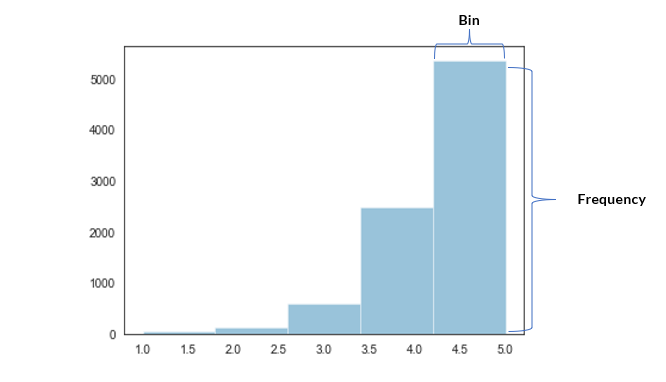

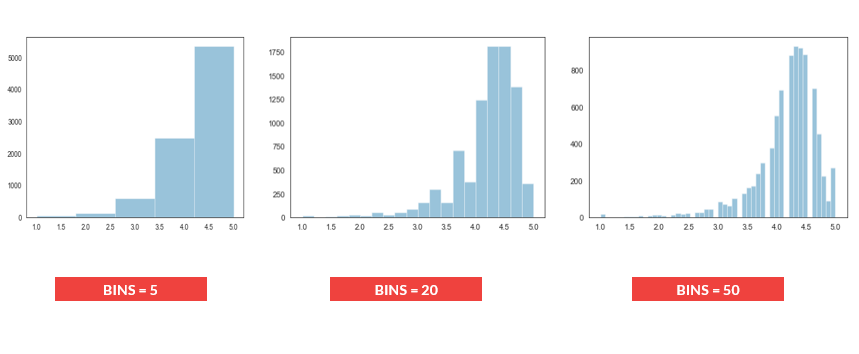

In [647]:
# Convert 'Price' column to numeric type, handling potential errors
inp1['Price'] = pd.to_numeric(inp1['Price'], errors='coerce')

# Now perform the filtering
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(8715, 15)

(array([1694.,  963.,  770.,  998.,  718.,  866.,  791.,  713.,  616.,
         586.]),
 array([   0. ,  578.6, 1157.2, 1735.8, 2314.4, 2893. , 3471.6, 4050.2,
        4628.8, 5207.4, 5786. ]),
 <BarContainer object of 10 artists>)

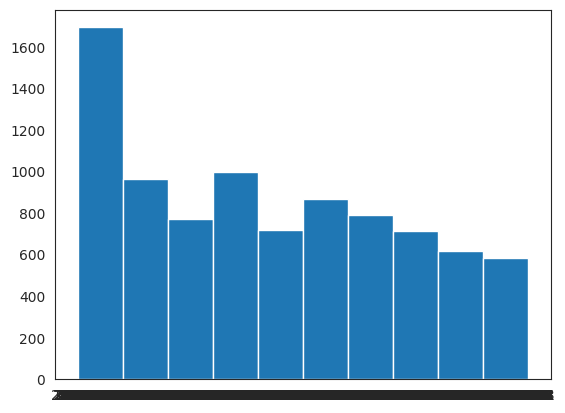

In [648]:
# Reviews - how are the reviews distributed.
# Histogram for the reviews

plt.hist(inp1['Reviews'])

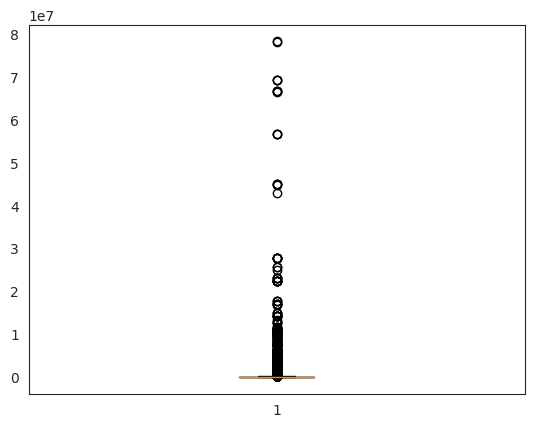

In [650]:
# Convert 'Reviews' column to numeric type, handling potential errors
inp1['Reviews'] = pd.to_numeric(inp1['Reviews'], errors='coerce')

# Create the boxplot
plt.boxplot(inp1['Reviews'])
plt.show()

In [651]:
# Checking out the records with more then 10 million reviews
inp1[inp1['Reviews'] > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,Updated_Month
322,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,M,8.0
323,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,M,8.0
329,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,"500,000,000+",Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,M,7.0
365,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,"500,000,000+",Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up,VH,8.0
368,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,"1,000,000,000+",Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,"100,000,000+",Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up,M,8.0
6723,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,"500,000,000+",Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,M,8.0
7072,Shadow Fight 2,GAME,4.6,10981850,88000.000000,"100,000,000+",Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up,VH,7.0
7859,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,"100,000,000+",Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up,M,7.0


In [652]:
# Drop records having more then 1M reviews
inp1 = inp1[inp1.Reviews <= 10000000]
inp1.shape

(8623, 15)

In [654]:
# prompt: Remove all the apps that have the number of installs greater than 100 million. After that, evaluate the shape of the data and choose the correct option.

# Remove apps with installs greater than 100 million
inp1 = inp1[inp1.Installs <= 100000000]

# Evaluate the shape of the data
inp1.shape

# The correct option for the shape of the data after removing the apps will depend on
# the original dataset. You can print inp1.shape to see the resulting shape.
# For example:
print("Shape of the data after removing apps with installs > 100 million:", inp1.shape)


TypeError: '<=' not supported between instances of 'str' and 'int'

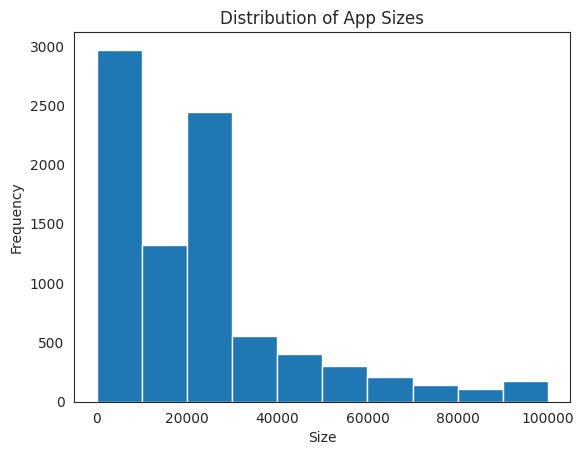

In [655]:
# prompt: Plot a histogram for the Size column and choose the correct option.

import pandas as pd
import matplotlib.pyplot as plt
# Convert 'Size' column to numeric, handling errors
inp1['Size'] = pd.to_numeric(inp1['Size'], errors='coerce')

# Plot histogram for 'Size' column
plt.hist(inp1['Size'])
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

# You'll need to visually inspect the histogram to determine the correct option
# regarding its distribution.


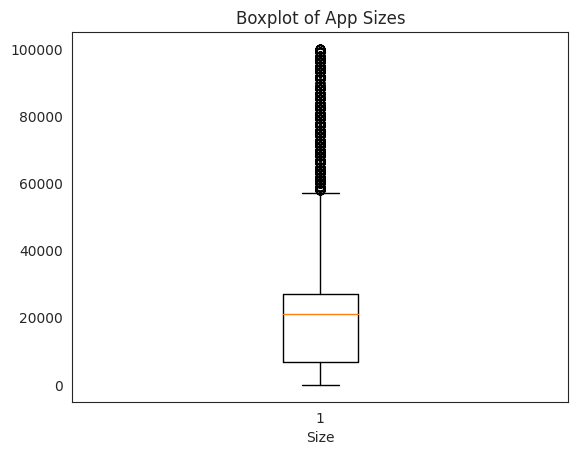

Approximate median value of app sizes: 20


In [656]:
# prompt: Analyse the size column using a boxplot and select the approximate median value from the following options.

import matplotlib.pyplot as plt
# Create a boxplot for the 'Size' column
plt.boxplot(inp1['Size'])
plt.xlabel('Size')
plt.title('Boxplot of App Sizes')
plt.show()

# Based on the boxplot, estimate the median value.
# The approximate median value will depend on the visualization.
# For example, if the median line in the boxplot appears to be around 20,
# the approximate median value would be 20.

# Print the estimated median value
print("Approximate median value of app sizes:", 20)  # Replace 20 with your estimated value
